<h1>"Where to live in Washington Metropolitan Area?"</h1>
<h3>Coursera - "IBM Data Science Professional Certificate" Specialization Capstone Project</h3>


by Claudio Ferrao

<hr>

Contents:

<a href='#1'>1. Business Problem</a><br>
<a href='#2'>2. Data to support this project</a><br>
<a href='#3'>3. Methodology</a><br>
<a href='#4'>4. Results</a><br>
<a href='#5'>5. Discussion</a><br>
<a href='#6'>6. Conclusion</a>

<hr>

<a name='1'><h2>1. Business Problem</h2></a>

<b>1.1. Problem definition:</b><br>
The process of finding a new place to live can be a daunting experience, especially if you do not know much about the area you want to move, and/or if the area is too broad to research.
This process can also be very time consuming and costly, especially if you are moving from a different city, state, country.

The analysis performed with this project is general and can be applied to any other city/county. In this project we are assuming that the area the family wants to search a place to live is Washington Metropolitan area.
The Washington metropolitan area is the metropolitan area centered on Washington, D.C., the capital of the United States. The area includes all of the federal district and parts of the U.S. states of Maryland and Virginia, along with a small portion of West Virginia. 


<br>

<b>1.2. Target audience:</b><br>
In this notebook we propose a way of shortening this search process by using data about the most popular venues of each Washington Metropolitan area county to help find their "venue profile".
There are two group of people interested in this type of analysis:
-	The some real estate companies knowing what are the requirements – venue profile of the client, this analysis will limit the search area to the preferred venues of clients, and therefore the need of real estate resources and time.
-	The families that want to move or relocate to this area
This type of analysis can speed up the process of searching a place to live saving time and money. It will also help families to have a more informed decision


<b>1.3. Search requirements:</b><br>
This is something that can change based on interviewing the family that s looking for a place to live.
For this exercise the venues that we consider important this family are:
- Grocery stores
- Gym
- Restaurants
- Cafe
- Parking


<a name='2'><h2>2. Data to support this project</h2></a>

<b>2.1. Data description</b><br>
In order to tackle the problem of defining the "venue profiles" of neighborhoods in a county, the following data was used:<br>

<b>- Web scraping with BeautifulSoup to obtain a list of all counties from the Washington Metropolitan area.</b><br>

The Wiki page Washington metropolitan area: https://en.wikipedia.org/wiki/Washington_metropolitan_area has a table with:

- a list of all the counties,
- 2016 estimate population, 
- 2010 census population,
- Percent change, 
- area size, and
- density.


Only the first column with the list of all counties is relevant to this project.

<b>- Nominatim from geopy.geocoders for geocoding the County names and get their coordinates.</b><br>

With Nominatim we will be able to concatenate the list of counties from the Washington metropolitan area with their coordinates.

The list of counties have counties from two states - VA and MD.
    Nominatim was executed two times to get the coordinates of counties from our list:
        - one for Virginia state counties, and 
        - one for Maryland state counties 
       
<b>-  Foursquare API to get all venues in each County.</b><br>

With Foursquare we will get the top 100 venues that are within a radius of 10000 meters of each county.


<a name='3'><h2>3. Methodology</h2></a>

The methods used in this work were:
1.  Web Scraping with the BeautifulSoup library
2.  Geocoding with Nominatim from geopy.geocoders
3.  Data acquisition from Foursquare's API
4.  Feature reduction by considering most common venue categories
5.  Machine learning: k-Means clustering because it is the most simple clustering algorithm and it was capable of meeting the proposed objective

<a name='3'><h2>4. Results</h2></a>

<h4>4.1. Web scraping</h4>

This is the Wikipedia page (https://en.wikipedia.org/wiki/Washington_metropolitan_area) that contains a list of all counties from Washington Metropolitan in a table format.</br>

Bellow I am importing the libraries needed to execute the functions.


In [1]:
import json # library to handle JSON files

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins

import warnings
warnings.filterwarnings("ignore")

import requests
from bs4 import BeautifulSoup as bs

The following function uses BeautifulSoup to scrape a Wikipedia page and extract the elements of its index/table of contents. It returns a list with the text for each element.<br>

In [2]:
from   bs4      import BeautifulSoup
import requests # library to handle requests

website_url = requests.get('https://en.wikipedia.org/wiki/Washington_metropolitan_area').text
soup = BeautifulSoup(website_url,'lxml')
My_table = soup.find('table',{'class':'wikitable sortable'})

I am just searching for the "a ref" lines to be able to extract the list of counties from Washinton Metropolitan Area.

In [3]:
links = My_table.findAll('a')
links

[<a href="/wiki/Washington,_D.C." title="Washington, D.C.">Washington, D.C.</a>,
 <a href="/wiki/Calvert_County,_Maryland" title="Calvert County, Maryland">Calvert County, Maryland</a>,
 <a href="/wiki/Charles_County,_Maryland" title="Charles County, Maryland">Charles County, Maryland</a>,
 <a href="/wiki/Frederick_County,_Maryland" title="Frederick County, Maryland">Frederick County, Maryland</a>,
 <a href="/wiki/Montgomery_County,_Maryland" title="Montgomery County, Maryland">Montgomery County, Maryland</a>,
 <a href="/wiki/Prince_George%27s_County,_Maryland" title="Prince George's County, Maryland">Prince George's County, Maryland</a>,
 <a href="/wiki/Alexandria,_Virginia" title="Alexandria, Virginia">Alexandria, Virginia</a>,
 <a href="/wiki/Arlington_County,_Virginia" title="Arlington County, Virginia">Arlington County, Virginia</a>,
 <a href="/wiki/Clarke_County,_Virginia" title="Clarke County, Virginia">Clarke County, Virginia</a>,
 <a href="/wiki/Culpeper_County,_Virginia" titl

Using code to extract titles from previous list and send it to a dataframe.

In [4]:
Names = []
for link in links:
    Names.append(link.get('title'))
   
#import pandas as pd
df = pd.DataFrame()
df['Names'] = Names

# Code used to remove duplicates if any
df1 = df.drop_duplicates()

total_df1 = len(df1)

print('Sucessfully scraped a total of %d unique Counties.' % total_df1)
df

Sucessfully scraped a total of 23 unique Counties.


,Names
0,"Washington, D.C."
1,"Calvert County, Maryland"
2,"Charles County, Maryland"
3,"Frederick County, Maryland"
4,"Montgomery County, Maryland"
5,"Prince George's County, Maryland"
6,"Alexandria, Virginia"
7,"Arlington County, Virginia"
8,"Clarke County, Virginia"
9,"Culpeper County, Virginia"


We sucessfully scraped the information we need.

<h4>4.2. Geocoding</h4>
Now, we need to obtain the coordinates of each county.<br>
This will be done with the geocoding feature of the Nominatim from geopy.geociders.

In [5]:
from geopy.geocoders import Nominatim
df2=df1
df2['Latitude']=''
df2['Longitude']=''

total_df2 = len(df2)


The Washington metropolitan Area is the metropolitan area centered on Washington, D.C., the capital of the United States. The area includes all of the federal district and parts of the U.S. states of Maryland and Virginia, along with a small portion of West Virginia. 

Calling geocoding for Virginia State first.

In [6]:
address = 'Virginia, United States'
geolocator = Nominatim()

In [7]:
for i in list(range(len(df2))):
        
    address=df2.iloc[i]['Names']+',VA, United States'

    geolocator = Nominatim()
    location = geolocator.geocode(address)
   
    if location!= None:
        
        latitude = location.latitude
        longitude = location.longitude
        df2.ix[i,'Latitude']=location.latitude
        df2.ix[i,'Longitude']=location.longitude
       


In [8]:
print('Finished Geocoding County from VA, United States ')

Finished Geocoding County from VA, United States 



Dataframe with coordinates of Counties from Virginia State.

In [9]:
df2

,Names,Latitude,Longitude
0,"Washington, D.C.",38.895,-77.0366
1,"Calvert County, Maryland",38.5289,-76.5378
2,"Charles County, Maryland",38.4992,-77.0278
3,"Frederick County, Maryland",39.4608,-77.4118
4,"Montgomery County, Maryland",39.1406,-77.2076
5,"Prince George's County, Maryland",38.8039,-76.8519
6,"Alexandria, Virginia",38.8148,-77.0902
7,"Arlington County, Virginia",38.8769,-77.0893
8,"Clarke County, Virginia",39.1197,-77.9926
9,"Culpeper County, Virginia",38.4912,-77.9618


Calling geocoding for Maryland State.

In [10]:
for i in list(range(len(df2))):
    
 #   print('Geocoding Names %3d of %3d ... ' % (i,total_df2) , end='')
    
    address=df2.iloc[i]['Names']+',Maryland, United States'
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    if location!= None:
        
        latitude = location.latitude
        longitude = location.longitude
        df2.ix[i,'Latitude']=location.latitude
        df2.ix[i,'Longitude']=location.longitude

In [11]:
print('Finished Geocoding County from MD, United States ')

Finished Geocoding County from MD, United States 


Dataframe with coordinates of Counties from Maryland State.

In [12]:
df2

,Names,Latitude,Longitude
0,"Washington, D.C.",39.5894,-77.7103
1,"Calvert County, Maryland",38.5289,-76.5378
2,"Charles County, Maryland",38.4992,-77.0278
3,"Frederick County, Maryland",39.4608,-77.4118
4,"Montgomery County, Maryland",39.1406,-77.2076
5,"Prince George's County, Maryland",38.8039,-76.8519
6,"Alexandria, Virginia",38.8148,-77.0902
7,"Arlington County, Virginia",38.8769,-77.0893
8,"Clarke County, Virginia",39.1197,-77.9926
9,"Culpeper County, Virginia",38.4912,-77.9618


In [13]:
df2.Names

0                     Washington, D.C.
1             Calvert County, Maryland
2             Charles County, Maryland
3           Frederick County, Maryland
4          Montgomery County, Maryland
5     Prince George's County, Maryland
6                 Alexandria, Virginia
7           Arlington County, Virginia
8              Clarke County, Virginia
9            Culpeper County, Virginia
10            Fairfax County, Virginia
11                   Fairfax, Virginia
12              Falls Church, Virginia
13           Fauquier County, Virginia
14            Fredericksburg, Virginia
15            Loudoun County, Virginia
16                  Manassas, Virginia
17             Manassas Park, Virginia
18     Prince William County, Virginia
19       Rappahannock County, Virginia
20       Spotsylvania County, Virginia
21           Stafford County, Virginia
22             Warren County, Virginia
Name: Names, dtype: object

I had issues in the past using using Nominatim feature geocoding while testing the code. 

To mitigate this issue I am exporting  the dataframe to a CSV file.

In [14]:
df1.to_csv('washington_coordinates.csv')
print("Dataframe exported to CSV File")

Dataframe exported to CSV File


<h4>4.3. Visualization of Counties on a map</h4>

We geocoded all 23 counties, but are the coordinates accurate?<br>
Let's check this by visualizing the neighborhoods in a map with the following functions:

In [15]:
# Creates the basemap centered at (center_lat,center_lng) and returns a map object
# I am using the coordinates of Arlington County in Virginia so Washington Metro Area can be centralized in the map.

center_lat = 38.881622
center_lng = -77.090981 

was_map = folium.Map(location=[center_lat, center_lng], zoom_start=9)

# instantiate a feature group for the Counties in the dataframe
was_counties = folium.map.FeatureGroup()

# loop through the list and add each to the 23 counties 
for lat, lng, label in zip(df2.Latitude,df2.Longitude, df2.Names):
    was_counties.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
      )
    
# add Counties to Washington metropolitan area map
was_map.add_child(was_counties)

<h4>4.4. Getting venue information</h4>

We will get data about venues around each County (from the Washington Metropolitan area) using the Foursquare API:

<h4> Load foursquare credentials for use with API to extra neighbourhood information </h4>

In [16]:
CLIENT_ID = 'ZEQE0BHD1SOI5MBDCI4TB3JSZQW3OZPUWSPTKA2E5L4QXPFZ' # your Foursquare ID
CLIENT_SECRET = 'LOIDIU3IZI1EDUMZKZRVDIT2MPMXMOB4344PEDRSVDQ2TKRF' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 9999

Your credentails:
CLIENT_ID: ZEQE0BHD1SOI5MBDCI4TB3JSZQW3OZPUWSPTKA2E5L4QXPFZ
CLIENT_SECRET:LOIDIU3IZI1EDUMZKZRVDIT2MPMXMOB4344PEDRSVDQ2TKRF


<h4> Function from the lab that gets the venue details</h4> 


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    n = 1
    for name, lat, lng in zip(Names, latitudes, longitudes):
   
        print('\n''Getting venue info for neighborhood %3d of %3d... ' % (n,total_df2) , end='')
        n+=1
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
      
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Counties', 
                  'Counties Latitude', 
                  'Counties Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
            
    return(nearby_venues)

In [18]:
import time
start = time.time()
DC_venues=getNearbyVenues(names=df2['Names'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                )

print('\n'"It took {:.2f} seconds to complete this request".format(time.time()-start))


Getting venue info for neighborhood   1 of  23... 
Getting venue info for neighborhood   2 of  23... 
Getting venue info for neighborhood   3 of  23... 
Getting venue info for neighborhood   4 of  23... 
Getting venue info for neighborhood   5 of  23... 
Getting venue info for neighborhood   6 of  23... 
Getting venue info for neighborhood   7 of  23... 
Getting venue info for neighborhood   8 of  23... 
Getting venue info for neighborhood   9 of  23... 
Getting venue info for neighborhood  10 of  23... 
Getting venue info for neighborhood  11 of  23... 
Getting venue info for neighborhood  12 of  23... 
Getting venue info for neighborhood  13 of  23... 
Getting venue info for neighborhood  14 of  23... 
Getting venue info for neighborhood  15 of  23... 
Getting venue info for neighborhood  16 of  23... 
Getting venue info for neighborhood  17 of  23... 
Getting venue info for neighborhood  18 of  23... 
Getting venue info for neighborhood  19 of  23... 
Getting venue info for neighbo

In [19]:
# Save the dataframe to avoid making too many requests to the API during development
DC_venues.to_csv( 'DC_venues.csv' )

<h4> 
Verify if there are some venues for which no category was assigned. In this case, the category field is filled with "MISSING".
</h4> 

In [20]:
print('Shape before =', DC_venues.shape )

missing_vector = DC_venues['Venue Category']=='MISSING'
print('Venues without an assigned category = %d' % missing_vector.sum() )

df_venues = DC_venues[ ~missing_vector ]

print('Shape after=', df_venues.shape)

Shape before = (1584, 7)
Venues without an assigned category = 0
Shape after= (1584, 7)


<h4> 
In case there are some venues for which no category was assigned. In this case, the category field is filled with "MISSING".
Let's drop all venues for which the category is missing.</h4> 

In [21]:
print('Shape before =', DC_venues.shape )

missing_vector = DC_venues['Venue Category']=='MISSING'
print('Venues without an assigned category = %d' % missing_vector.sum() )
DC_venues = DC_venues[ ~missing_vector ]

print('Shape after=', DC_venues.shape)

Shape before = (1584, 7)
Venues without an assigned category = 0
Shape after= (1584, 7)


<h4>4.5. How are the categories distributed among the venues?</h4>

In [22]:

df_tmp = pd.DataFrame(DC_venues['Venue Category'].value_counts())

total_categories = df_tmp.shape[0]

print('Total number of categories =', total_categories)
display(df_tmp)




Total number of categories = 237


,Venue Category
Coffee Shop,68
Pizza Place,67
American Restaurant,63
Sandwich Place,52
Mexican Restaurant,45
Fast Food Restaurant,40
Park,39
Grocery Store,31
Bakery,31
Ice Cream Shop,31


<h4> There are several unique categories, but many of them have very few representative venues.</h4>
    
    
<h4>These low-populated categories can act as noise in our feature space and make clustering harder. </h4>
    
<h4> So we'll drop all categories which represent less than 0.5% of the total number of venues.</h4>

In [23]:
#creating a copy for code testing purposes

DC_venues_backup =  DC_venues 
DC_venues_backup.count()

Counties              1584
Counties Latitude     1584
Counties Longitude    1584
Venue                 1584
Venue Latitude        1584
Venue Longitude       1584
Venue Category        1584
dtype: int64

In [24]:
DC_venues = DC_venues_backup

print(DC_venues.shape)

total_venues=df_tmp.sum()[0]

# Calculate the percentage of "venue occupancy" for each category
df_tmp['percentage'] = (df_tmp['Venue Category']/total_venues)*100

# We'll keep only the categories for which the "venue occupancy" is > 0.5%
mask_categories = df_tmp['percentage']>0.5
df_filtered_categories = df_tmp[mask_categories]
list_kept_categories = list(df_filtered_categories.index)

# Creates a new empty dataframe
#df_new = pd.DataFrame(columns=['Venue Name','Venue Category','Latitude','Longitude','Neighborhood'])
df_new = pd.DataFrame


mask_venues = []
for category in list(DC_venues['Venue Category']):
    mask_venues.append(category in list_kept_categories)

DC_venues = DC_venues[ mask_venues ]

print(DC_venues.shape)

print('Now we are keeping %d categories.' % len(list_kept_categories))

(1584, 7)
(1112, 7)
Now we are keeping 51 categories.


<h4>Number of venues by County </h4>

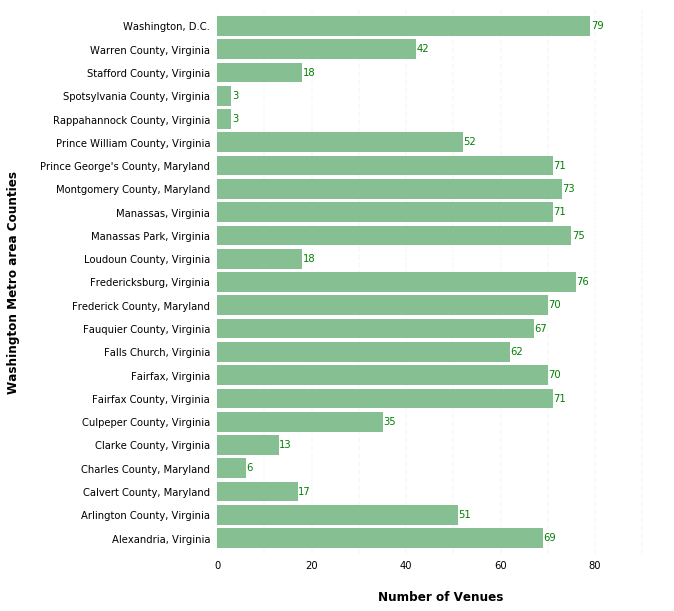

In [25]:
# Look at the number of venues by County
z = DC_venues.groupby('Counties')['Venue'].count()
ax = z.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    
   # ax.txt('Venues' + 3, i + .25, str('Venues'), color='blue', fontweight='bold')
    
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    # Set x-axis label
    ax.set_xlabel("Number of Venues", labelpad=20, weight='bold', size=12)
    # Set y-axis label
    ax.set_ylabel("Washington Metro area Counties", labelpad=20, weight='bold', size=12)
    # Format y-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
        
    
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 3)), fontsize=10, color='green')
    

<h4> Top 10 category types </h4>

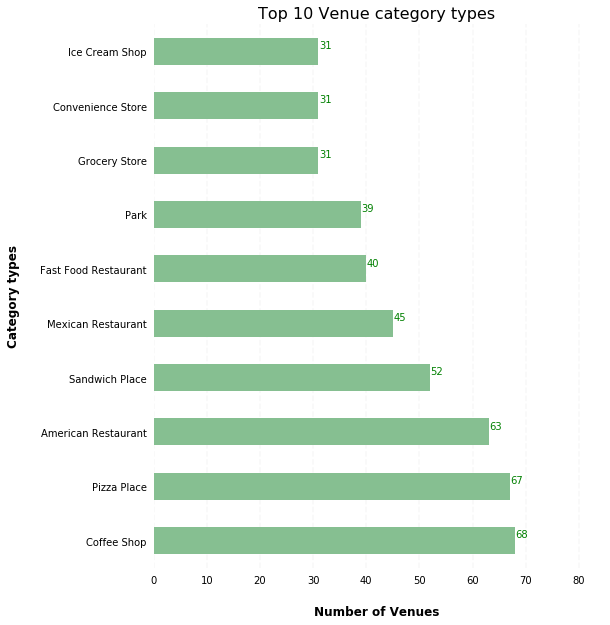

In [26]:
DC_venues['Venue Category'].value_counts()[:10]


# Look at the number of venues by County
z = DC_venues['Venue Category'].value_counts()[:10]
ax = z.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.5)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

plt.title('Top 10 Venue category types', fontsize=16)


# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    
   # ax.txt('Venues' + 3, i + .25, str('Venues'), color='blue', fontweight='bold')
    
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    # Set x-axis label
    ax.set_xlabel("Number of Venues", labelpad=20, weight='bold', size=12)
    # Set y-axis label
    ax.set_ylabel("Category types", labelpad=20, weight='bold', size=12)
    # Format y-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
        
    
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 3)), fontsize=10, color='green')


<h4> Analyze Each County
One hot encode categories and store results in a new data frame called Was_onehot </h4>

In [27]:
# one hot encoding
was_onehot = pd.get_dummies(DC_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
was_onehot['Counties'] = DC_venues['Counties']

# move neighborhood column to the first column
fixed_columns = [was_onehot.columns[-1]] + list(was_onehot.columns[:-1])
was_onehot = was_onehot[fixed_columns]

print(was_onehot.shape)
was_onehot.head()

(1112, 52)


,Counties,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Bookstore,Breakfast Spot,Brewery,Burger Joint,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Department Store,Diner,Discount Store,Donut Shop,Fast Food Restaurant,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Trail,Vietnamese Restaurant
0,"Washington, D.C.",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Washington, D.C.",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Washington, D.C.",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Washington, D.C.",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,"Washington, D.C.",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
print('Shape of the original venues dataframe =', df_venues.shape)


# Creates a new dataframe with the one-hot encoding columns
df_onehot = pd.get_dummies(DC_venues['Venue Category'])

# Adds a column with the name of the neighborhood for each venue
df_onehot['Neighborhood'] = DC_venues['Counties']

print('Shape of the one-hot encoding dataframe =', df_onehot.shape)

# Builds a new dataframe with the number of occurrences of each category for each county
# Here the zeros and ones of the one-hot encoding act as counters.
df_count = df_onehot.groupby('Neighborhood').sum()

# Adds a column with the total number of venues for each neighborhood
df_count['Total'] = df_count.sum(axis=1)

print('Shape of the counting dataframe =', df_count.shape)


# Builds a new dataframe with the frequency, in %, of each venue for each neighborhood
df_freq = df_count.copy()

for column in df_freq.columns:
    df_freq[column] = (df_freq[column]/df_freq['Total'])*100

df_freq.drop('Total', axis=1, inplace=True)

print('Shape of the frequency dataframe =', df_freq.shape)

Shape of the original venues dataframe = (1584, 7)
Shape of the one-hot encoding dataframe = (1112, 52)
Shape of the counting dataframe = (23, 52)
Shape of the frequency dataframe = (23, 51)


Now we have a dataframe with all information we need to proceed to the clustering step.

<h3>4.6. Clustering</h3>
Now we will use k-Means clustering in order to find "venue profiles" for the Washington Metropolitan area counties.<br>
First let's find the optimum value for k, which is the number of clusters.

The majority of counties are focused on one cluster. That will not help with reduction of area that a professional want to pick for live. For that reason the number of klsuter is increased to 9. It seems that there is another break there.

In [29]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_freq)

In [30]:
# Creating a new dataframe with the neighborhood names
df_clust = pd.DataFrame(df_freq.index.values)
df_clust.columns = ['Neighborhood']

# Adding the cluster ID as a column of the dataframe
df_clust['Cluster'] = kmeans.labels_

display(df_clust.head(5))
print(df_clust.shape)

,Neighborhood,Cluster
0,"Alexandria, Virginia",6
1,"Arlington County, Virginia",6
2,"Calvert County, Maryland",7
3,"Charles County, Maryland",3
4,"Clarke County, Virginia",8


(23, 2)


Sorting datafram with counties and coordinates from Washington Metropolitan area

In [31]:

df2.sort_values('Names', inplace=True, ascending=True)
df2

,Names,Latitude,Longitude
6,"Alexandria, Virginia",38.8148,-77.0902
7,"Arlington County, Virginia",38.8769,-77.0893
1,"Calvert County, Maryland",38.5289,-76.5378
2,"Charles County, Maryland",38.4992,-77.0278
8,"Clarke County, Virginia",39.1197,-77.9926
9,"Culpeper County, Virginia",38.4912,-77.9618
10,"Fairfax County, Virginia",38.8156,-77.2837
11,"Fairfax, Virginia",38.8462,-77.3064
12,"Falls Church, Virginia",38.8823,-77.1711
13,"Fauquier County, Virginia",38.7514,-77.8141


In [32]:
df_clust

,Neighborhood,Cluster
0,"Alexandria, Virginia",6
1,"Arlington County, Virginia",6
2,"Calvert County, Maryland",7
3,"Charles County, Maryland",3
4,"Clarke County, Virginia",8
5,"Culpeper County, Virginia",0
6,"Fairfax County, Virginia",6
7,"Fairfax, Virginia",6
8,"Falls Church, Virginia",6
9,"Fauquier County, Virginia",0


Merging original file with Cluster classification

In [33]:

pd.Series(kmeans.labels_).value_counts()


df2_merged = df2

# add clustering labels
df2_merged['Cluster'] = kmeans.labels_
df2_merged.head()


df2_merged.head() # check the last columns!


,Names,Latitude,Longitude,Cluster
6,"Alexandria, Virginia",38.8148,-77.0902,6
7,"Arlington County, Virginia",38.8769,-77.0893,6
1,"Calvert County, Maryland",38.5289,-76.5378,7
2,"Charles County, Maryland",38.4992,-77.0278,3
8,"Clarke County, Virginia",39.1197,-77.9926,8


In [34]:
df2

,Names,Latitude,Longitude,Cluster
6,"Alexandria, Virginia",38.8148,-77.0902,6
7,"Arlington County, Virginia",38.8769,-77.0893,6
1,"Calvert County, Maryland",38.5289,-76.5378,7
2,"Charles County, Maryland",38.4992,-77.0278,3
8,"Clarke County, Virginia",39.1197,-77.9926,8
9,"Culpeper County, Virginia",38.4912,-77.9618,0
10,"Fairfax County, Virginia",38.8156,-77.2837,6
11,"Fairfax, Virginia",38.8462,-77.3064,6
12,"Falls Church, Virginia",38.8823,-77.1711,6
13,"Fauquier County, Virginia",38.7514,-77.8141,0


In [35]:
# Creates the basemap centered at (lat,lng) and returns a map object
center_lat = 38.881622
center_lng = -77.090981 

def map_define( center_lat , center_lng , zoom=9):
    map_rp_fig = folium.Figure(width=1000,height=800)
    map_rp = folium.Map( location=[center_lat,center_lng], zoom_start=zoom, tiles="OpenStreetMap")
    map_rp.add_to(map_rp_fig)
    
    return map_rp


# Adds circular markers to a map object (folium_map). The locations and labels are taken from lists
def map_markers( folium_map , lat_list , lng_list , label_list , color , radius ):
    for lat,lng,label in zip(lat_list,lng_list,label_list):
        folium.features.CircleMarker(location=[lat,lng],
                                     popup=str(label.replace('\'','_').replace('\\','_').replace('/','_').replace(':','_')),
                                     color=color,
                                     fill=True,
                                     fill_color=color,
                                     fill_opacity=0.75,
                                     radius=radius).add_to(folium_map)
    return folium_map



<h3> Sorting file by County name and Cluster number </h3>

In [36]:
#df2_merged.sort_values('Names', inplace=True, ascending=True)
df2_merged = df2_merged.sort_values(['Cluster','Names'], ascending=[True,True])

df2_merged

,Names,Latitude,Longitude,Cluster
9,"Culpeper County, Virginia",38.4912,-77.9618,0
13,"Fauquier County, Virginia",38.7514,-77.8141,0
15,"Loudoun County, Virginia",39.0985,-77.6705,0
17,"Manassas Park, Virginia",38.7709,-77.4363,0
16,"Manassas, Virginia",38.7449,-77.4824,0
5,"Prince George's County, Maryland",38.8039,-76.8519,0
18,"Prince William County, Virginia",38.739,-77.5537,0
22,"Warren County, Virginia",38.9132,-78.2097,0
20,"Spotsylvania County, Virginia",38.1881,-77.6742,1
19,"Rappahannock County, Virginia",38.6926,-78.1496,2


<h3> 4.7. Mapping counties with cluster color classification </h3>

In [37]:
import numpy             as np
import matplotlib.cm     as cm
import matplotlib.colors as colors

lat_rp = 38.881622
lon_rp = -77.090981

map_clusters = map_define( lat_rp , lon_rp )

colors_array = cm.rainbow(np.linspace(0, 1, k))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for cl in range(0,k):
    
    tmp = df2_merged[ df2_merged['Cluster']==cl ]
    map_clusters = map_markers( map_clusters , tmp['Latitude'] , tmp['Longitude'] , [str(cl)]*tmp.shape[0], rainbow[cl] , 6 )
    

map_clusters



<h3> How are these clusters populated? </h3>

In [38]:
df_clust_sizes = pd.DataFrame(df_clust['Cluster'].value_counts())
df_clust_sizes.index.name = 'Cluster ID'
df_clust_sizes.columns = ['Count']
df_clust_sizes['Percentage'] = np.round((df_clust_sizes['Count']/df_clust_sizes['Count'].sum())*100 , 1)

display(df_clust_sizes)

,Count,Percentage
Cluster ID,,
0,8,34.8
6,6,26.1
7,3,13.0
8,1,4.3
5,1,4.3
4,1,4.3
3,1,4.3
2,1,4.3
1,1,4.3


<h3> 4.8. How are the clusters different in terms of venue categories?  </h3>

We have clusters with very different sizes. From cluster 0 comprising 43.5% of all Counties to cluster 1,2,3,4,5,6,7 comprising only 1 of all Counties.<br>
How are the clusters different in terms of venue categories?

In [39]:
def normalize_column(df,column):
    return df[column]/df[column].sum()

for cluster in range(0,k):

    postcodes_cluster = df_clust[df_clust['Cluster']==cluster]['Neighborhood'].unique()
    
    cluster_size = len( df_clust[df_clust['Cluster']==cluster]['Neighborhood'] )
    cluster_size_perc = np.round( (cluster_size / df_clust['Cluster'].count())*100 , 1 )
    
    print('Profile of cluster with ID={}:'.format(cluster))
    print('  It has {} members ({}% of total venues)'.format( cluster_size,cluster_size_perc))
    
    tmp  = pd.DataFrame()
    tmp2 = pd.DataFrame()

    for postcode in postcodes_cluster:
        tmp[postcode]=df_freq.loc[postcode,]
    tmp2 = pd.DataFrame(tmp.transpose().mean().sort_values(ascending=False).head(10))
    tmp2.reset_index(inplace=True)
    tmp2.columns=['Venue Category','Venue Mean Frequency']
    tmp2['Venue Frequency in top-10'] = np.round(normalize_column(tmp2,'Venue Mean Frequency')*100,1)
    display(tmp2)

Profile of cluster with ID=0:
  It has 8 members (34.8% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Coffee Shop,6.728929,13.6
1,Pizza Place,6.376217,12.8
2,Mexican Restaurant,5.931880,12.0
3,Convenience Store,5.890625,11.9
4,Sandwich Place,5.498663,11.1
5,Fast Food Restaurant,5.413758,10.9
6,American Restaurant,5.141254,10.4
7,Grocery Store,3.176340,6.4
8,Ice Cream Shop,2.992407,6.0
9,Burger Joint,2.472506,5.0


Profile of cluster with ID=1:
  It has 1 members (4.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Golf Course,66.666667,66.7
1,Furniture / Home Store,33.333333,33.3
2,Vietnamese Restaurant,0.000000,0.0
3,Coffee Shop,0.000000,0.0
4,Greek Restaurant,0.000000,0.0
5,Gas Station,0.000000,0.0
6,Fast Food Restaurant,0.000000,0.0
7,Donut Shop,0.000000,0.0
8,Discount Store,0.000000,0.0
9,Diner,0.000000,0.0


Profile of cluster with ID=2:
  It has 1 members (4.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,American Restaurant,66.666667,66.7
1,Gas Station,33.333333,33.3
2,Coffee Shop,0.000000,0.0
3,Greek Restaurant,0.000000,0.0
4,Golf Course,0.000000,0.0
5,Furniture / Home Store,0.000000,0.0
6,Fast Food Restaurant,0.000000,0.0
7,Donut Shop,0.000000,0.0
8,Discount Store,0.000000,0.0
9,Diner,0.000000,0.0


Profile of cluster with ID=3:
  It has 1 members (4.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,American Restaurant,33.333333,33.3
1,Seafood Restaurant,33.333333,33.3
2,Hotel,16.666667,16.7
3,Burger Joint,16.666667,16.7
4,Coffee Shop,0.000000,0.0
5,Golf Course,0.000000,0.0
6,Gas Station,0.000000,0.0
7,Furniture / Home Store,0.000000,0.0
8,Fast Food Restaurant,0.000000,0.0
9,Donut Shop,0.000000,0.0


Profile of cluster with ID=4:
  It has 1 members (4.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Pizza Place,16.666667,23.1
1,Café,11.111111,15.4
2,Gym / Fitness Center,5.555556,7.7
3,Bar,5.555556,7.7
4,Breakfast Spot,5.555556,7.7
5,Brewery,5.555556,7.7
6,Chinese Restaurant,5.555556,7.7
7,Coffee Shop,5.555556,7.7
8,Convenience Store,5.555556,7.7
9,Golf Course,5.555556,7.7


Profile of cluster with ID=5:
  It has 1 members (4.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Clothing Store,20.253165,32.7
1,Pizza Place,8.860759,14.3
2,Sandwich Place,7.594937,12.2
3,Shoe Store,3.797468,6.1
4,Donut Shop,3.797468,6.1
5,Discount Store,3.797468,6.1
6,Pharmacy,3.797468,6.1
7,American Restaurant,3.797468,6.1
8,Ice Cream Shop,3.797468,6.1
9,Seafood Restaurant,2.531646,4.1


Profile of cluster with ID=6:
  It has 6 members (26.1% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Coffee Shop,8.776478,19.1
1,Pizza Place,4.896964,10.7
2,American Restaurant,4.697009,10.2
3,Park,4.448044,9.7
4,Bakery,4.393418,9.6
5,Thai Restaurant,4.022663,8.8
6,Mexican Restaurant,3.883669,8.5
7,Grocery Store,3.634802,7.9
8,Gym,3.623849,7.9
9,Café,3.454320,7.5


Profile of cluster with ID=7:
  It has 3 members (13.0% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,American Restaurant,8.495503,16.5
1,Pizza Place,8.094501,15.7
2,Sandwich Place,5.695120,11.0
3,Fast Food Restaurant,5.143742,10.0
4,Hotel,4.798762,9.3
5,Seafood Restaurant,4.228955,8.2
6,Brewery,4.097744,7.9
7,Italian Restaurant,3.752764,7.3
8,Park,3.659148,7.1
9,Coffee Shop,3.583960,7.0


Profile of cluster with ID=8:
  It has 1 members (4.3% of total venues)


,Venue Category,Venue Mean Frequency,Venue Frequency in top-10
0,Gym / Fitness Center,7.692308,10.0
1,Pizza Place,7.692308,10.0
2,Asian Restaurant,7.692308,10.0
3,Bookstore,7.692308,10.0
4,Coffee Shop,7.692308,10.0
5,Discount Store,7.692308,10.0
6,Greek Restaurant,7.692308,10.0
7,Grocery Store,7.692308,10.0
8,Italian Restaurant,7.692308,10.0
9,Mexican Restaurant,7.692308,10.0


And there we have it! We successfully clustered the Counties of Washington metropolitan area into 8 clusters with distinct "venue profiles".<br>
Now let's analyze these results.

<a name='5'><h2>5. Discussion</h2></a>

The objective of this analysis was to shorten the search process of finding a place to live in the Washington Metropolitan area by  analyzing the most popular "venue profiles" for clusters of counties from the Washington metropolitan area. 

The ten most common venue categories of each cluster that we identified are enough to reveal differences between them and allow us to imagine which "client profile" fits the best with each cluster.<br>

Family venue requirements:
- Grocery stores, 
- Gym
- Restaurants
- Cafe
- Parking

Resume of cluster venues and matches from the family venue requirements.


1. Cluster 0 - Have 4 of the 5 family requirements:  Grocery stores, Restaurants, Cafe, and Parking <br>
2. Cluster 1 - Have 2 of the 5 family requirements:  Restaurants and Cafe 
3. Cluster 2 - Have 2 of the 5 family requirements:  Restaurants and Cafe
4. Cluster 3 - Have 2 of the 5 family requirements:  Restaurants and Cafe
5. Cluster 4 - Have 4 of the 5 family requirements:  Gym, Restaurants, Cafe, and Parking
6. Cluster 5 - Have 4 of the 5 family requirements:  Gym, Restaurants, Cafe,and Parking
7. Cluster 6 - Have 2 of the 5 family requirements:  Restaurants and Cafe
8. Cluster 7 - Have 1 of the 5 family requirements:  Restaurants
9. Cluster 8 - Have 5 of the 5 family requirements:  Grocery stores, Gym, Restaurants, Cafe, and Parking

The Cluster that better represent the family requirements is Cluster 8.


<a name='6'><h2>6. Conclusion</h2></a>

The analysis showed here, albeit simple, successfully identified 9 clusters of counties of the Washington Metropolitan area with different venues profiles that can be mapped to different "client requirements". 

The cluster that best matches the client's "venue requirements" is cluster 8. It still has too many Counties, a new clustering can be performed considering only the elements of the chosen cluster. This can be done several times until there's a reduced area that eventual could mean one or a couple of counties left as the best match.



Future enhancements to this analysis to help families choose an area to live:
- include office locations of the major companies established in this area. 
- include types of public transportation to the map
- include school locations and ranking to the map

Other enhancements:
- use the profession profiles of the family, and scrap results of type of profession in Google jobs (https://careers.google.com/jobs/) and map it to map.





<hr>

Claudio Ferrao<br>
US, Virginia<br>
March 2019